# 1.1   
Choose a wikipedia article. You will download and acces the article using this python module: wikipedia. Use the content property to extract the text. Print the title of the article and the first N=200 words from the article to verify that all works well. Print the POS-tagging for the first N=20 sentences.

In [1]:
pip install wikipedia

Note: you may need to restart the kernel to use updated packages.


In [2]:
import wikipedia
import re
import nltk
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tag.stanford import StanfordPOSTagger
import pandas as pd
import numpy as np
import collections
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
import nltk.collocations
import nltk.corpus
import collections
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\ACASA-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\ACASA-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ACASA-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
page = wikipedia.page("Riaa")

In [5]:
page.title

'Recording Industry Association of America'

In [6]:
page.url

'https://en.wikipedia.org/wiki/Recording_Industry_Association_of_America'

In [7]:
page.content[:200]

'The Recording Industry Association of America (RIAA) is a trade organization that represents the recording industry in the United States. Its members consist of record labels and distributors, which t'

In [8]:
tok_data = sent_tokenize(page.content)

In [9]:
model_path = './postagger/models/english-bidirectional-distsim.tagger'
jar_tagger_path = './postagger/stanford-postagger-4.2.0.jar'

In [10]:
tagger = StanfordPOSTagger(model_path, jar_tagger_path)

In [11]:
N = 2
for i in range(N):
    sentence = tok_data[i]
    pos_tokens = tagger.tag(sentence.split()) 
    print('Sentence number '+str(i+1)+' :\n')
    print(pos_tokens)
    print('\n')

Sentence number 1 :

[('The', 'DT'), ('Recording', 'NNP'), ('Industry', 'NNP'), ('Association', 'NNP'), ('of', 'IN'), ('America', 'NNP'), ('(RIAA)', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('trade', 'NN'), ('organization', 'NN'), ('that', 'WDT'), ('represents', 'VBZ'), ('the', 'DT'), ('recording', 'NN'), ('industry', 'NN'), ('in', 'IN'), ('the', 'DT'), ('United', 'NNP'), ('States.', 'NNP')]


Sentence number 2 :

[('Its', 'PRP$'), ('members', 'NNS'), ('consist', 'VBP'), ('of', 'IN'), ('record', 'NN'), ('labels', 'NNS'), ('and', 'CC'), ('distributors,', 'NN'), ('which', 'WDT'), ('the', 'DT'), ('RIAA', 'NNP'), ('says', 'VBZ'), ('"create,', 'FW'), ('manufacture,', 'FW'), ('and/or', 'CC'), ('distribute', 'VBP'), ('approximately', 'RB'), ('85%', 'CD'), ('of', 'IN'), ('all', 'DT'), ('legally', 'RB'), ('sold', 'VBN'), ('recorded', 'JJ'), ('music', 'NN'), ('in', 'IN'), ('the', 'DT'), ('United', 'NNP'), ('States".', 'NNP')]




# 1.2    
Create a function that receives a part of speech tag and returns a list with all the words from the text (can be given as a parameter too) that represent that part of speech. Create a function that receives a list of POS tags and returns a list with words having any of the given POS tags (use the first function in implementing the second one).

In [12]:
def preprocessing(data):

    from nltk.corpus import stopwords
    translate_table = dict((ord(char), None) for char in string.punctuation) 
    data1 = data.translate(translate_table)
    data2 = word_tokenize(data1)

    data2 = [w.lower() for w in data2]

    stopwords = set(stopwords.words('english'))
    preprocessed_data = [x for x in data2 if not x in stopwords]  

    return preprocessed_data

In [13]:
def all_words_pos(pos_tag, text):
    words = []
    pp_text = preprocessing(text)
    pos_tokens = tagger.tag(pp_text)
    for tuple_ in pos_tokens:
        if tuple_[1] == pos_tag:
            words.append(tuple_[0])  
            #words.append(tuple_)
        
    return words

In [14]:
pos_tag = 'NN'
text = 'The Recording Industry Association of America (RIAA) is a trade organization that represents the recording industry in the United States.'

lst = all_words_pos(pos_tag, text)
print(lst)

['recording', 'industry', 'association', 'trade', 'organization', 'industry']


In [15]:
def all_words_multiple_pos(pos_tags, text):
    lst = []
    for pos_tag in pos_tags:
        lst.append(all_words_pos(pos_tag, text))
    
    lst = [word for sublist in lst for word in sublist]
    return lst

In [16]:
pos_tags = ['NN', 'VBZ']
text = 'The Recording Industry Association of America (RIAA) is a trade organization that represents the recording industry in the United States.'

lst = all_words_multiple_pos(pos_tags, text)
print(lst)

['recording', 'industry', 'association', 'trade', 'organization', 'industry', 'represents']


# 1.3
Use the function above to print all the nouns (there are multiple tags for nouns), and, respectively all the verbs (corresponding to all verb tags). Also, print the percentage of content words (noun+verbs) from the entire text

In [17]:
pos_tags = ['NN', 'NNS', 'NNP', 'NNPS']
text = 'In February 2007, the RIAA began sending letters accusing Internet users of sharing files and directing them to web site P2PLAWSUITS.COM, where they can make discount settlements payable by credit card.[42] The letters go on to say that anyone not settling will have lawsuits brought against them. Typical settlements are between $3,000 and $12,000. This new strategy was formed because the RIAA legal fees were cutting into the income from settlements.[43] In 2008, RIAA sued 19-year-old Ciara Sauro for allegedly sharing 10 songs online. The RIAA also launched an early settlement program directed to ISPs and to colleges and universities, urging them to pass along letters to subscribers and students offering early settlements, prior to the disclosure of their identities. The settlement letters urged ISPs to preserve evidence for the benefit of the RIAA and invited the students and subscribers to visit an RIAA website for the purpose of entering into a discount settlement payable by credit card.[45] By March 2007, the focus had shifted from ISPs to colleges and universities. In October 1998, the RIAA filed a lawsuit in the Ninth U.S. Court of Appeals in San Francisco claiming the Diamond Multimedia Rio PMP300 player violated the 1992 Audio Home Recording Act. The Rio PMP300 was significant because it was the second portable consumer MP3 digital audio player released on the market. The three-judge panel ruled in favor of Diamond, paving the way for the development of the portable digital player market. In 2003, the RIAA sued college student developers of LAN search engines Phynd and Flatlan, describing them as a sophisticated network designed to enable widespread music thievery. In September 2003, the RIAA filed suit in civil court against several private individuals who had shared large numbers of files with Kazaa. Most of these suits were settled with monetary payments averaging 3,000. Kazaa publisher Sharman Networks responded with a lawsuit against the RIAA, alleging that the terms of use of the network were violated and that unauthorized client software was used in the investigation to track down the individual file sharers (such as Kazaa Lite). An effort to throw out this suit was denied in January 2004, but that suit was settled in 2006. Sharman Networks agreed to a global settlement of litigation brought against it by the Motion Picture Association of America, the International Federation of the Phonographic Industry, and the RIAA. The creators of the popular Kazaa file-sharing network will pay $115 million to the RIAA, unspecified future amounts to the MPAA and the software industry, and install filters on its networks to prevent users from sharing copyrighted works on its network. RIAA has also filed suit in 2006 to enjoin digital XM Satellite Radio from enabling its subscribers from playing songs it has recorded from its satellite broadcasts.[53] It is also suing several Internet radio stations. On October 12, 2007, the RIAA sued Usenet.com seeking a permanent injunction to prevent the company from aiding, encouraging, enabling, inducing, causing, materially contributing to, or otherwise facilitating copyright infringement. This suit, the first that the RIAA has filed against a Usenet provider, has added another branch to the RIAA rapidly expanding fight to curb the unauthorized distribution of copyrighted materials. Unlike many of the RIAA previous lawsuits, this suit is filed against the provider of a service who has no direct means of removing infringing content. The RIAA argument relies heavily on the fact the Usenet.com, the only defendant that has been named currently, promoted their service with slogans and phrases that strongly suggested that the service could be used to obtain free music. On April 28, 2008, RIAA member labels sued Project Playlist, a web music search site, claiming that most of the sound recordings in the site index of links are infringing. Project Playlist website denies that any of the music is hosted on Project Playlists own servers. On June 30, 2009, the RIAA prevailed in its fight against Usenet.com, in a decision, that the U.S. District Judge Harold Baer of the Southern District of New York ruled in favor of the music industry on all its main arguments: that Usenet.com is guilty of direct, contributory, and vicarious infringement. In addition, and perhaps most importantly for future cases, Baer said that Usenet.com cannot claim protection under the Sony Betamax decision. That ruling states that companies cannot be held liable for contributory infringement if the device they create is "capable of significant noninfringing uses".[56] Furthermore, the parties are now headed to federal court for damage assessments and awards, which could amount to several millions of dollars for the music industry. On October 26, 2010, RIAA members won a case against LimeWire, a P2P file-sharing network, for illegal distribution of copyrighted works.[58] On October 29, in retaliation, riaa.org was taken offline via denial-of-service attacks executed by members of Operation Payback and Anonymous.'

lst_nouns = all_words_multiple_pos(pos_tags, text)
print(lst_nouns)

['riaa', 'internet', 'web', 'site', 'p2plawsuitscom', 'discount', 'credit', 'card42', 'anyone', 'strategy', 'income', 'settlements43', 'riaa', 'settlement', 'program', 'pass', 'disclosure', 'settlement', 'evidence', 'benefit', 'riaa', 'riaa', 'website', 'purpose', 'discount', 'settlement', 'credit', 'card45', 'march', 'focus', 'riaa', 'lawsuit', 'ninth', 'court', 'diamond', 'player', 'home', 'recording', 'act', 'consumer', 'mp3', 'audio', 'player', 'market', 'threejudge', 'panel', 'favor', 'diamond', 'way', 'development', 'player', 'market', 'riaa', 'college', 'student', 'search', 'network', 'music', 'thievery', 'riaa', 'suit', 'court', 'kazaa', 'publisher', 'sharman', 'lawsuit', 'riaa', 'network', 'client', 'software', 'investigation', 'track', 'file', 'effort', 'throw', 'suit', 'suit', 'sharman', 'settlement', 'litigation', 'motion', 'picture', 'association', 'america', 'federation', 'industry', 'riaa', 'network', 'riaa', 'mpaa', 'software', 'industry', 'network', 'riaa', 'suit', 'xm

In [18]:
pos_tags = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

lst_vbs = all_words_multiple_pos(pos_tags, text)
print(lst_vbs)

['say', 'preserve', 'pay', 'install', 'obtain', 'amount', 'began', 'brought', 'sued', 'urged', 'invited', 'shifted', 'violated', 'ruled', 'sued', 'filed', 'shared', 'settled', 'responded', 'violated', 'denied', 'settled', 'agreed', 'brought', 'filed', 'recorded', 'sued', 'added', 'suggested', 'sued', 'prevailed', 'said', 'held', 'executed', 'sending', 'accusing', 'sharing', 'directing', 'settling', 'cutting', 'sharing', 'urging', 'offering', 'entering', 'claiming', 'paving', 'describing', 'averaging', 'alleging', 'sharing', 'enabling', 'playing', 'suing', 'seeking', 'aiding', 'encouraging', 'inducing', 'causing', 'contributing', 'facilitating', 'expanding', 'removing', 'infringing', 'claiming', 'infringing', 'filesharing', 'formed', 'launched', 'directed', 'filed', 'released', 'designed', 'used', 'copyrighted', 'filed', 'copyrighted', 'filed', 'named', 'promoted', 'used', 'hosted', 'ruled', 'copyrighted', 'taken', 'make', 'go', 'sauro', 'riaa', 'visit', 'enable', 'kazaa', 'use', 'preve

In [19]:
print('The percentage of content words is: '+str((len(lst_nouns)+len(lst_vbs))/len(text.split())))

The percentage of content words is: 0.4539800995024876


# 1.4
Print a table of four columns. The columns will be separated with the character "|". The head of the table will be:
Original word | POS | Simple lemmatization | Lemmatization with POS
that will compare the results of lemmatization (WordNetLemmatizer) without giving the part of speech and the lemmatization with the given part of speech for each word. The table must contain only words that give different results for the two lemmatizations (for example, the word "running" - without POS, the result will always be running, but with pos="v" it is "run"). The table will contain the results for the first N sentences from the text (each row corresponding to a word). Try to print only distinct results inside the table (for example, if a word has two occurnces inside the text, and matches the requirments for appearing in the table, it should have only one corresponding row).

In [20]:
N = 3

words = []
for contor, sentence in enumerate(tok_data):
    if contor <= N:
        
        from nltk.corpus import stopwords
        translate_table = dict((ord(char), None) for char in string.punctuation) 
        sentence = sentence.translate(translate_table)
        
        words_ = word_tokenize(sentence)
        
        words_ = [w.lower() for w in words_]
        
        stopwords = set(stopwords.words('english'))
        words_ = [x for x in words_ if not x in stopwords]  
        
        for word in words_:
            words.append(word)

originals = list(set(words))

In [21]:
lemmatizer = WordNetLemmatizer()

lemmas = []
for word in originals:
    lemmas.append(lemmatizer.lemmatize(word))

In [22]:
pos_ = tagger.tag(originals)
pos = []
for word, tag in pos_:
    pos.append(tag)

In [23]:
# https://stackoverflow.com/a/46231553/12299607

def get_wordnet_pos(tag):

    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [24]:
pos_lemmas = []
for word, tag in pos_:
    word_net_tag = get_wordnet_pos(tag)
    
    if word_net_tag is None:
        pos_lemmas.append(lemmatizer.lemmatize(word))
    else:
        pos_lemmas.append(lemmatizer.lemmatize(word, word_net_tag))

In [25]:
print(len(originals))
print(len(lemmas))
print(len(pos))
print(len(pos_lemmas))

43
43
43
43


In [26]:
table_ = pd.DataFrame({'Original Word': originals, 'POS': pos, 'Simple Lemmatization': lemmas, 'Lemmatization with POS' : pos_lemmas} ) 

In [27]:
originals_dif = []
pos_dif = [] 
lemmas_dif = []
pos_lemmas_dif = []

for index, row in table_.iterrows():
    if row['Simple Lemmatization'] != row['Lemmatization with POS']:
        originals_dif.append(row['Original Word'])
        pos_dif.append(row['POS'])
        lemmas_dif.append(row['Simple Lemmatization'])
        pos_lemmas_dif.append(row['Lemmatization with POS'])

In [28]:
table = pd.DataFrame({'Original Word': originals_dif, 'POS': pos_dif, 'Simple Lemmatization': lemmas_dif, 'Lemmatization with POS' : pos_lemmas_dif} ) 
print(table)

  Original Word  POS Simple Lemmatization Lemmatization with POS
0     recording  VBG            recording                 record
1          sold  VBD                 sold                   sell
2    represents  VBZ           represents              represent
3        united  VBN               united                  unite
4      relating  VBG             relating                 relate
5        formed  VBN               formed                   form
6      recorded  VBD             recorded                 record


# 1.5
Print a graphic showing the number of words for each part of speech. 

In [29]:
N = 50
for w, f in nltk.FreqDist(pos).most_common(N):
    print(str(w) + ' - ' + str(f))

NN - 15
NNS - 7
VBZ - 4
VBP - 3
VB - 2
VBG - 2
CD - 2
VBD - 2
JJ - 2
RB - 2
VBN - 2


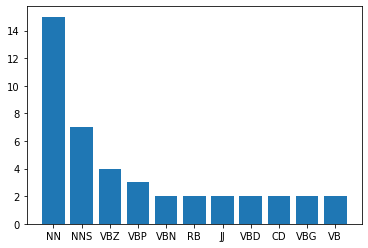

In [30]:
# https://stackoverflow.com/a/35603850/12299607

counts = Counter(pos)

labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

plt.bar(indexes, values)

plt.xticks(indexes, labels)
plt.show()


# 1.6
Create your own grammar with different terminal symbols. Apply recursive descent parsing on a sentence with at least 5 different parts of speech and a tree of at least level 4.

In [37]:
gram=nltk.CFG.fromstring("""  S -> NP VP 
NP -> PRPS NN
VP -> VBZ ADJP | VBP NP 
PRPS -> "My" | "Our" | "Your"
NN -> "dog" | "cat" | "pet" | "homework"
VBP -> "has" 
NP -> DT ADJP NNS 
DT -> "the"
ADJP -> JJ | RBS JJ
NNS -> "eyes" 
RBS -> "most"
JJ -> "beautiful" | "playful" | "enjoyable"
VBZ -> "is" """)

sent = ["My", "dog", "has", "the", "most", "beautiful", "eyes"]
rdp = nltk.RecursiveDescentParser(gram)
for tree in rdp.parse(sent):
    print(tree)

(S
  (NP (PRPS My) (NN dog))
  (VP
    (VBP has)
    (NP (DT the) (ADJP (RBS most) (JJ beautiful)) (NNS eyes))))


In [32]:
# nltk.app.rdparser()

# 1.7
Apply shift reduce parsing on the same sentence and check programatically if the two trees are equal. Find a sentence with equal trees and a sentence with different results (we consider the tree different even when it has no sollution for one of the parsers, but has for the other).

In [38]:
# Sentence with different results

srp = nltk.ShiftReduceParser(gram)
for tree in srp.parse(sent):
    print(tree)

In [39]:
# Sentence with the same results

sent = ["My", "homework", "is", "enjoyable"]
for tree in rdp.parse(sent):
    print(tree)
    print("\n\n")
    
for tree in srp.parse(sent):
    print(tree)    

(S (NP (PRPS My) (NN homework)) (VP (VBZ is) (ADJP (JJ enjoyable))))



(S (NP (PRPS My) (NN homework)) (VP (VBZ is) (ADJP (JJ enjoyable))))


In [35]:
# nltk.app.srparser()